In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



## Cleaning Data Sets

In [2]:
#Filtering down columns for each of the 3 data sets as follows:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [3]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']]
#FEMA Disaster Declarations Summary is a summarized dataset describing all federally declared disasters, beginning with the first disaster declaration in 1953
#for more information: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59522,3533,FL,EM,2020,Hurricane
59523,3533,FL,EM,2020,Hurricane
59524,3533,FL,EM,2020,Hurricane
59525,3533,FL,EM,2020,Hurricane


In [4]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
#The dataset contains funded projects (financial obligation to grantee) under the Hazard Mitigation Assistance (HMA) grant programs.
#For more information: https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-projects-v2
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [28]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount','lockedInCeilingAmount']]
#The dataset contains disaster level financial information for FEMA's Hazard Mitigation Grant Program (HMGP)
#For more information: https://www.fema.gov/openfema-data-page/hazard-mitigation-grant-program-disaster-summaries
hazard_sum_clean

,disasterNumber,obligatedTotalAmount,lockedInCeilingAmount
0,1071,2834575.0,2756605.0
1,1337,782081.0,950900.0
2,1326,333150.0,314981.0
3,1506,1791043.0,2192856.0
4,1211,413384.0,437358.0
...,...,...,...
1731,4551,0.0,0.0
1732,4556,0.0,0.0
1733,4553,0.0,0.0
1734,4554,0.0,0.0


In [29]:
#Looking at an overview of disasters and the Hazard mitigation projects associated with them
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state','incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary

numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

## Isolating Flood Data 

In [30]:
#From the disaster summary DF, isoloting rows with incidentType = 'Flood'
disaster_sum_clean.head()
flood = disaster_sum_clean['incidentType']=='Flood'
disaster_sum_flood = disaster_sum_clean[flood]
disaster_sum_flood = disaster_sum_flood.drop_duplicates()
disaster_sum_flood

,disasterNumber,state,declarationType,fyDeclared,incidentType
2,3,LA,DR,1953,Flood
5,8,IA,DR,1953,Flood
7,9,TX,DR,1953,Flood
8,5,MT,DR,1953,Flood
11,15,CA,DR,1954,Flood
...,...,...,...,...,...
51229,4475,ND,DR,2020,Flood
51277,4477,WI,DR,2020,Flood
57607,4519,OR,DR,2020,Flood
58946,4539,WA,DR,2020,Flood


### Calculate number of Flood disasters per state regardless of Hazard Mitigation Funding

In [31]:
#Group the Flood Disaster Summary DF by State and count 'disasterNumber'
disaster_flood_state = disaster_sum_flood.groupby('state').count()
disaster_flood_state = disaster_flood_state['disasterNumber']
print(disaster_flood_state)

state
AK    14
AL    10
AR    20
AS     1
AZ    14
CA    37
CO    13
CT     3
DE     2
FL    13
FM     1
GA     9
HI    10
IA    29
ID    17
IL    16
IN    13
KS    13
KY    24
LA    28
MA     7
MD    10
ME    13
MH     1
MI    12
MN    28
MO    23
MP     1
MS    10
MT    13
NC     8
ND    32
NE    20
NH    10
NJ     8
NM    19
NV    11
NY    25
OH    17
OK    23
OR    16
PA    26
PR     8
SC     3
SD    18
TN    18
TX    40
UT     9
VA    15
VI     3
VT    16
WA    31
WI    19
WV    30
WY     6
Name: disasterNumber, dtype: int64


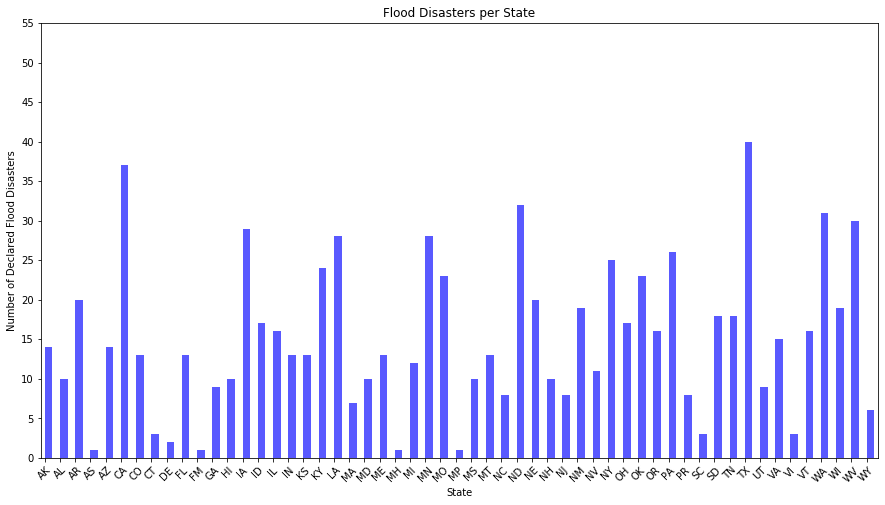

In [32]:
#Plotting the number of declared fire disasters per state
disaster_flood_state.plot(kind='bar', color='b', alpha=0.65, align="edge", figsize=(15,8), rot=45)
plt.xlabel("State")
plt.ylabel("Number of Declared Flood Disasters")
plt.title("Flood Disasters per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(0,60,5))
plt.show()

### Calculate Total Obligated Amount Per State for Hazard Mitigation

In [34]:
#merge the Flood Disaster Summary DF with the Hazard Summary DF to pull in financial data 
flood_state_funding = pd.merge(disaster_sum_flood, hazard_sum_clean, on='disasterNumber')
flood_state_funding

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount,lockedInCeilingAmount
0,820,UT,DR,1989,Flood,95048.0,90061.0
1,821,KY,DR,1989,Flood,579052.0,545000.0
2,824,MN,DR,1989,Flood,201496.0,320484.0
3,823,TX,DR,1989,Flood,0.0,0.0
4,822,WA,DR,1989,Flood,221682.0,208709.0
...,...,...,...,...,...,...,...
290,4475,ND,DR,2020,Flood,0.0,0.0
291,4477,WI,DR,2020,Flood,0.0,0.0
292,4519,OR,DR,2020,Flood,0.0,0.0
293,4539,WA,DR,2020,Flood,0.0,0.0


In [40]:
#group the Flood state funding DF by state and sum in order to calculate the total 'obligatedTotalAmount'
flood_state_funding_gr = flood_state_funding.groupby('state').sum()
flood_state_funding_OTA = flood_state_funding_gr[['obligatedTotalAmount','lockedInCeilingAmount']]
flood_state_funding_OTA

,obligatedTotalAmount,lockedInCeilingAmount
state,,
AK,9.802369e+06,1.066170e+07
AL,2.212540e+05,2.066680e+05
AR,2.186663e+06,1.060169e+07
AZ,9.146024e+06,9.370440e+06
CA,4.285621e+07,1.239226e+08
CO,6.269702e+07,6.952786e+07
CT,2.462960e+05,2.863280e+05
DE,3.389080e+05,3.151620e+05
FL,2.583468e+06,2.450932e+06


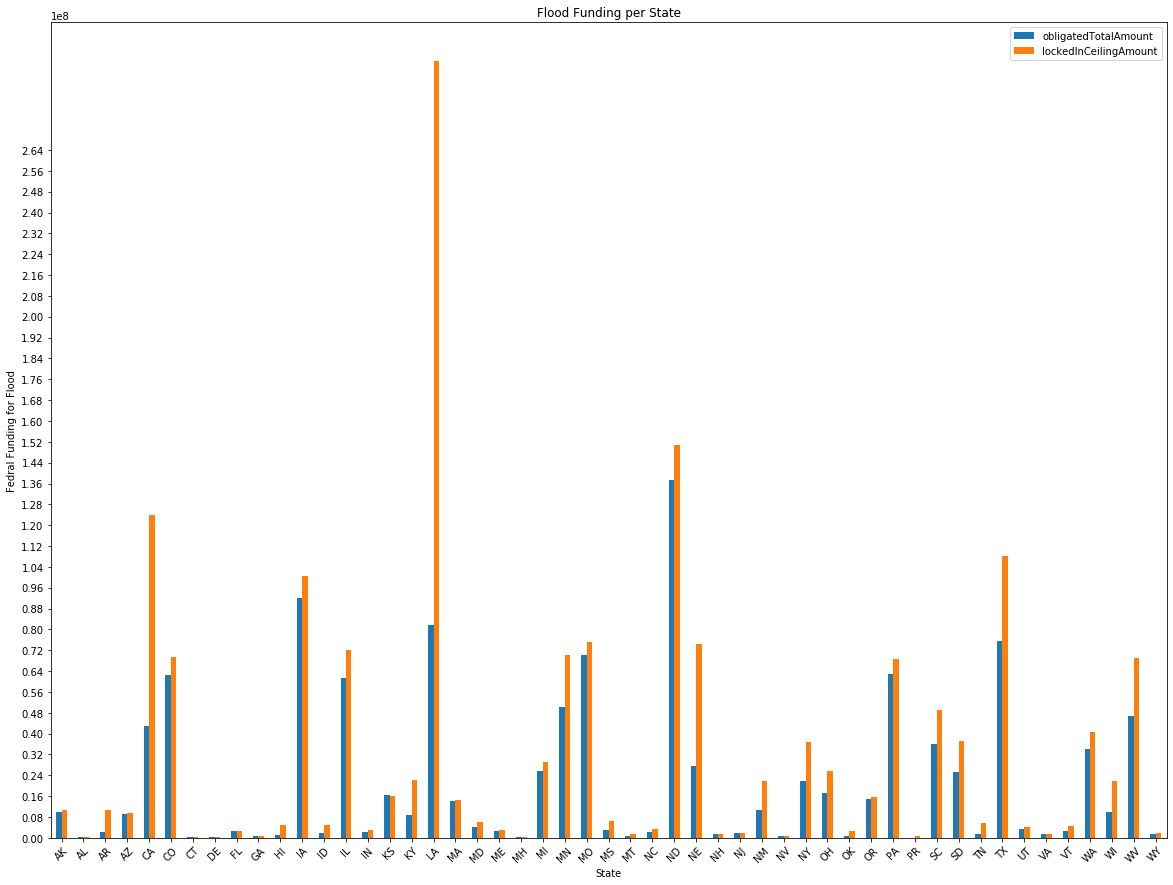

In [49]:
#Plot the amount of funding per state
flood_state_funding_OTA.plot(kind="bar", figsize=(20,15), rot=45)
# (x="state",y=['obligatedTotalAmount','lockedInCeilingAmount'],kind='bar', color='r', alpha=0.65, align="edge", figsize=(15,10), rot=45)
plt.xlabel("State")
plt.ylabel("Fedral Funding for Flood")
plt.title("Flood Funding per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(1.305600e+04,2.646353e+08,8e+6))
plt.show()

### Funding Through the years for Louisiana

In [54]:
#Isolate LA's funding 
la = flood_state_funding['state']=='LA'
la_year_funding = flood_state_funding[la]
la_year_funding = la_year_funding.groupby('fyDeclared').sum()
la_year_funding[['obligatedTotalAmount','lockedInCeilingAmount']]

,obligatedTotalAmount,lockedInCeilingAmount
fyDeclared,,
1989,203760.00,224493.0
1990,0.00,0.0
1991,105114.00,96325.0
1993,0.00,0.0
2011,1762074.09,2026125.0
2015,1066415.11,1216154.0
2016,78564006.67,290964320.0
2019,0.00,3539558.0


Text(0, 0.5, 'Federal Funding')

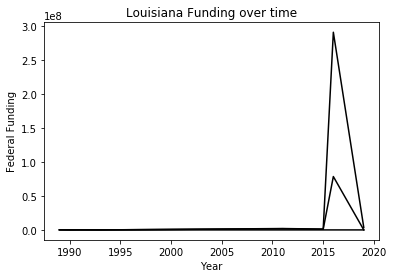

In [55]:
#plot LA's funding through the years 
la_funding_time = plt.plot(la_year_funding, color="black", label="Louisiana Funding over time")
plt.title("Louisiana Funding over time")
plt.xlabel("Year")
plt.ylabel("Federal Funding")

Pull in census data and run a scatter plot for correlation between population and funding $ - Run the persons correlation 